# Graph-Visualisierung (Matplotlib, Hauptanzeige)

Dieses Notebook zeigt die Matplotlib-basierte Haupt-Visualisierung des gerichteten Graphen
für das Transportproblem. Es verwendet `networkx` für Graph-Handling und `matplotlib`
für die Darstellung. Die interaktiven Plotly/pyvis-Abschnitte wurden entfernt — Matplotlib ist
die primäre Visualisierung.


In [19]:
# Installationszelle (falls nötig)
import sys, subprocess
packages = ['networkx', 'matplotlib']
try:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--quiet'] + packages)
except Exception as e:
    print('Installation fehlgeschlagen oder bereits installiert:', e)


In [ ]:
# Imports + Graph-Erzeugung + Transportzuweisung
import networkx as nx
import matplotlib.pyplot as plt
from generator import generate_random_directed_graph

try:
    from transport import assign_transport_flows, greedy_assign
except Exception:
    assign_transport_flows = None
    greedy_assign = None
    print('Warnung: transport.py konnte nicht importiert werden. Kanten bleiben evtl. unassigned.')

# Parameter
seed = 43
num_nodes = 6
num_edges = 12

# Erzeuge Beispielgraph (balance_demand=True sorgt für Sum(supply)==0)
nodes, edges = generate_random_directed_graph(num_nodes, num_edges, seed, supply_range=5, balance_demand=True)

# Baue networkx DiGraph aus Node/Edge-Objekten
G = nx.DiGraph()
for n in nodes:
    G.add_node(n.id, supply=n.supply)
for e in edges:
    # transported kann -1 (unassigned) sein
    transported = e.transported
    G.add_edge(e.source, e.target, transported=transported)

print('Graph erzeugt: #nodes=', G.number_of_nodes(), ' #edges=', G.number_of_edges())


Graph erzeugt: #nodes= 6  #edges= 12


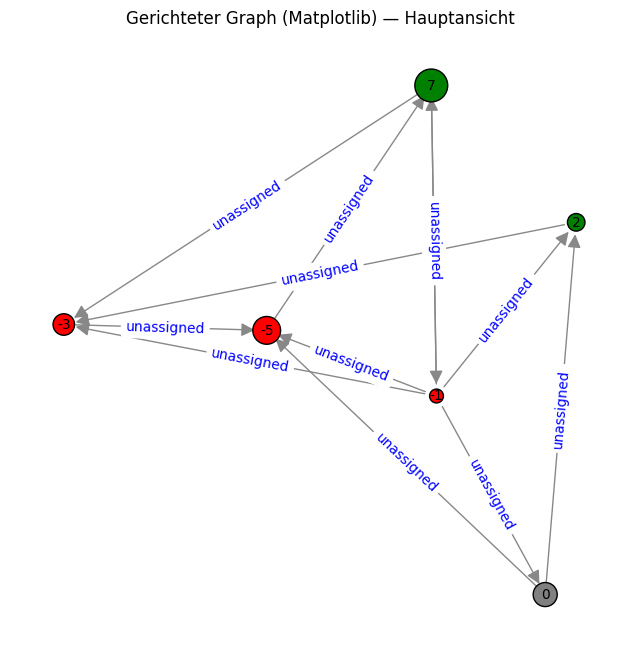

In [21]:
# Matplotlib-Visualisierung (Hauptdarstellung)
pos = nx.spring_layout(G, seed=seed)

# Node style
node_colors = [ 'green' if G.nodes[n]['supply']>0 else ('red' if G.nodes[n]['supply']<0 else 'gray') for n in G.nodes() ]
node_sizes = [max(100, 300 if G.nodes[n]['supply']==0 else 80 * abs(G.nodes[n]['supply'])) for n in G.nodes()]
labels = {n: str(G.nodes[n].get('supply', '')) for n in G.nodes()}  # Show supply as node label

plt.figure(figsize=(8,8))
# Nodes and labels
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, linewidths=1, edgecolors='black')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)

# Edges as arrows (directed)
nx.draw_networkx_edges(
    G, pos,
    arrows=True,
    arrowstyle='-|>',
    arrowsize=20,
    edge_color='#888',
    width=1
)

# Edge labels: show transported or 'unassigned'
edge_labels = {(u, v): ('unassigned' if d.get('transported', -1) < 0 else str(d.get('transported'))) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue')

plt.title('Gerichteter Graph (Matplotlib) — Hauptansicht')
plt.axis('off')
plt.show()
